In [1]:
from drumsim import Mode, CircularDrum
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Drum Vibrations: Analysis

## 3.1 Modal Dynamics and Relations

MoviePy - Building file Final\(0,1).gif with imageio.


MoviePy - Building file Final\(0,2).gif with imageio.


MoviePy - Building file Final\(0,3).gif with imageio.


MoviePy - Building file Final\(0,4).gif with imageio.


MoviePy - Building file Final\(1,1).gif with imageio.


MoviePy - Building file Final\(1,2).gif with imageio.


MoviePy - Building file Final\(1,3).gif with imageio.


MoviePy - Building file Final\(1,4).gif with imageio.


MoviePy - Building file Final\(2,1).gif with imageio.


MoviePy - Building file Final\(2,2).gif with imageio.


MoviePy - Building file Final\(2,3).gif with imageio.


MoviePy - Building file Final\(2,4).gif with imageio.


MoviePy - Building file Final\(3,1).gif with imageio.


MoviePy - Building file Final\(3,2).gif with imageio.


MoviePy - Building file Final\(3,3).gif with imageio.


MoviePy - Building file Final\(3,4).gif with imageio.


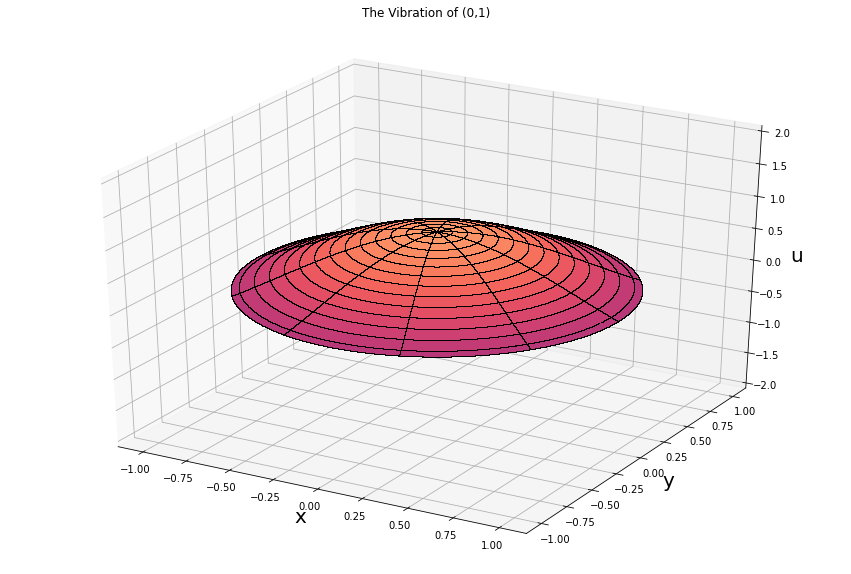

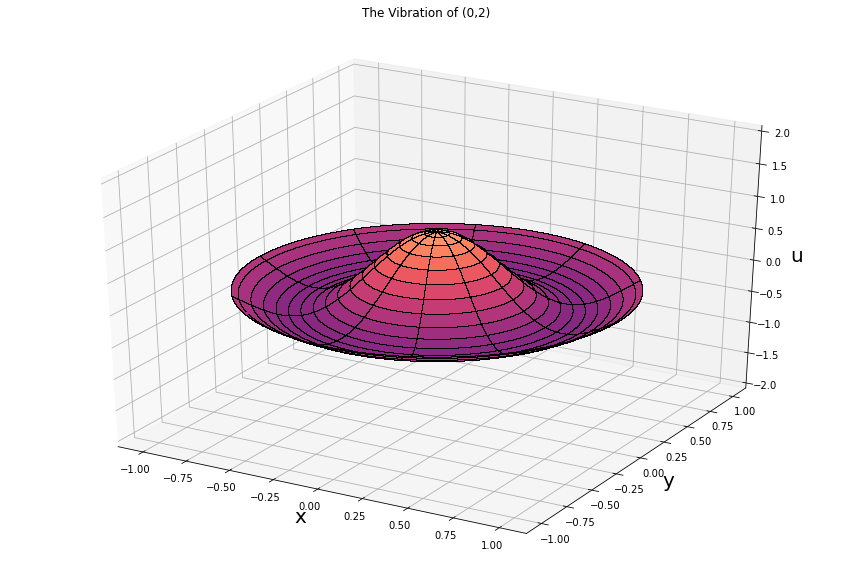

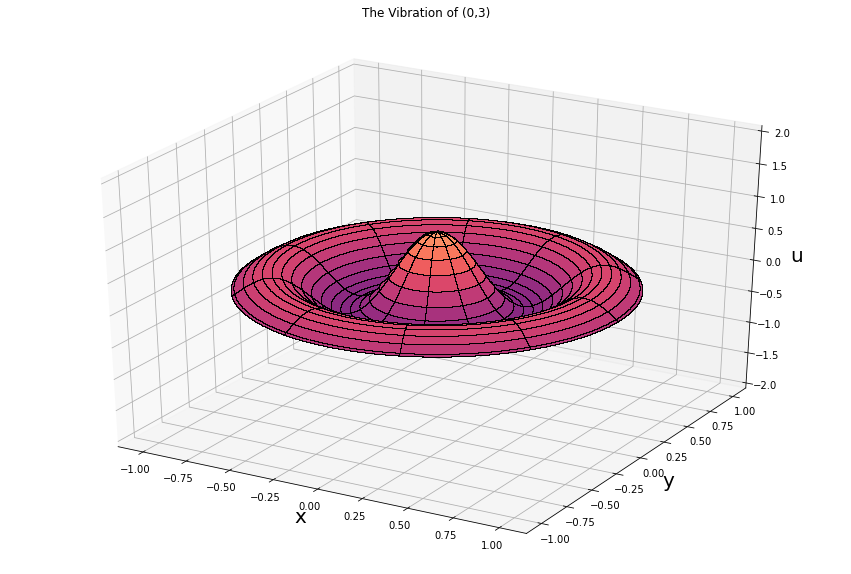

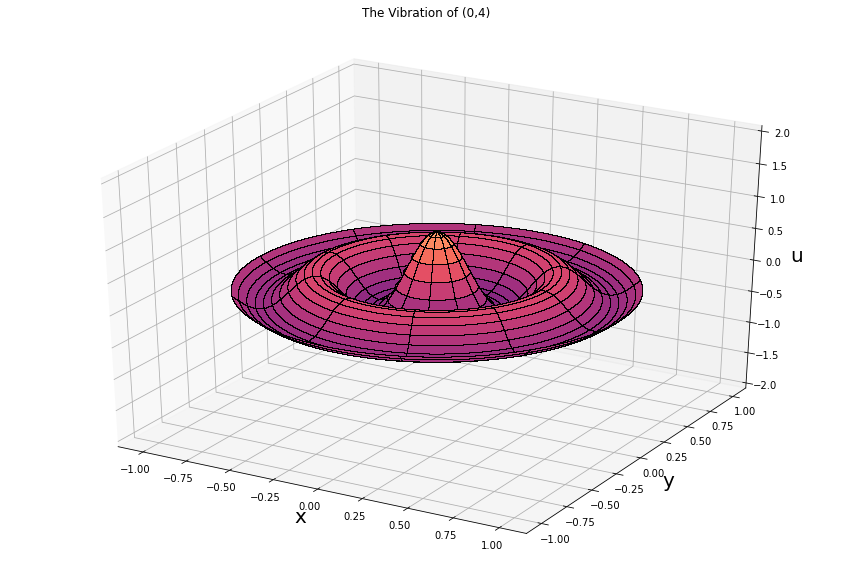

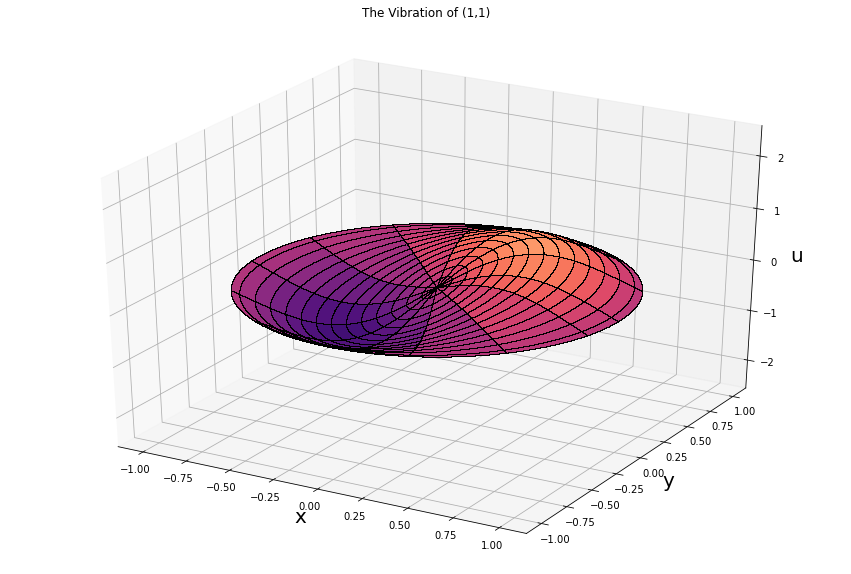

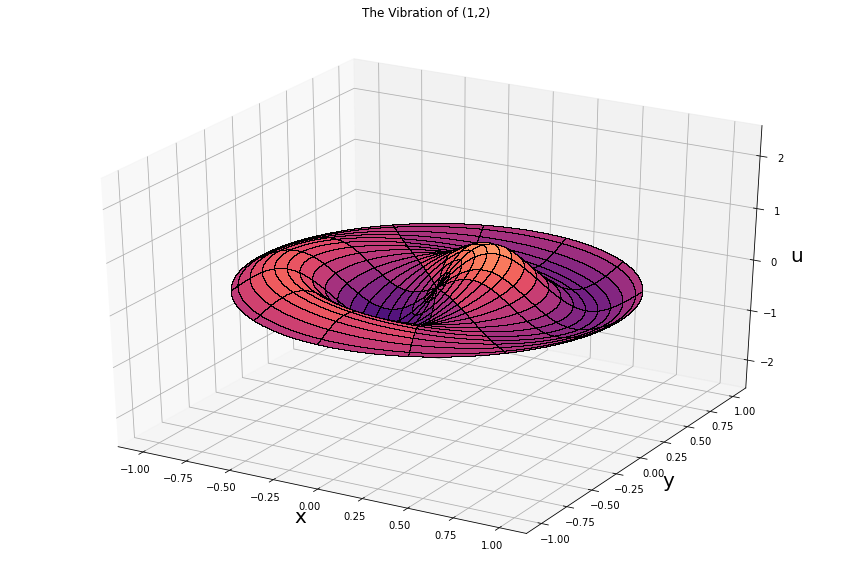

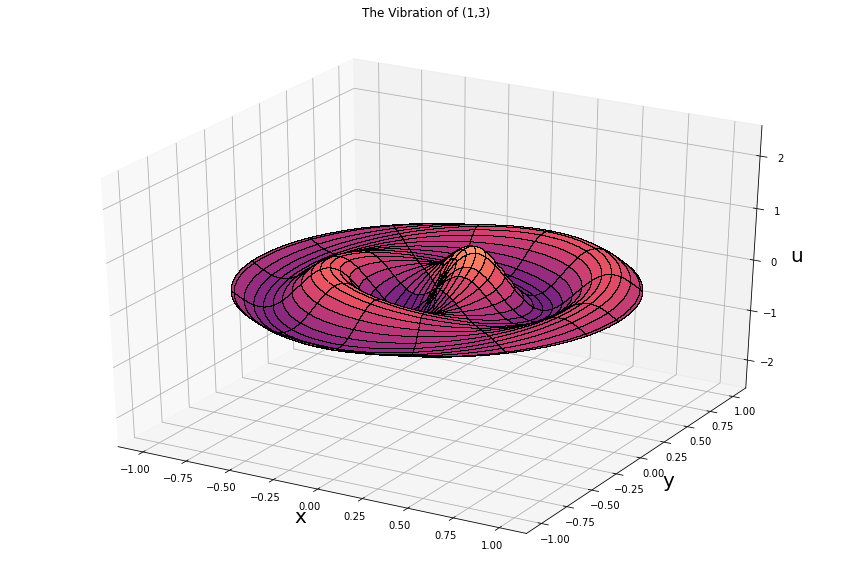

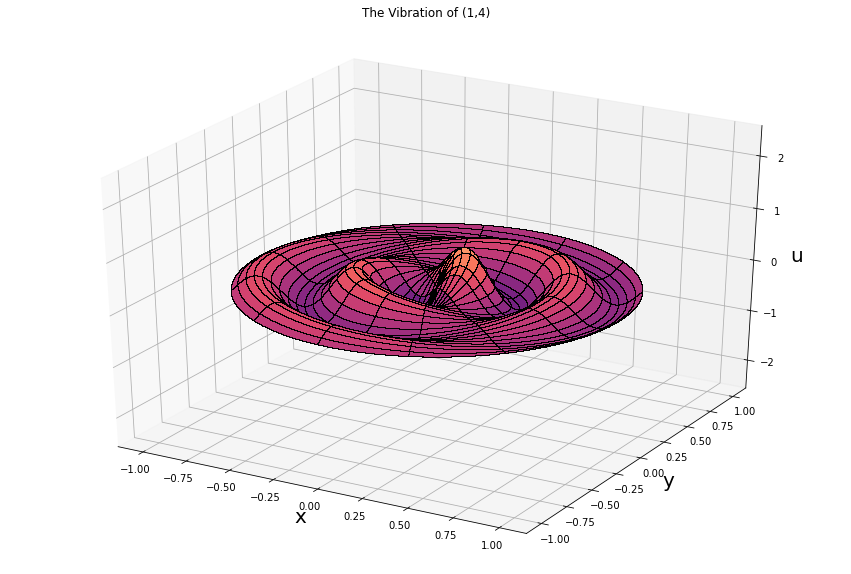

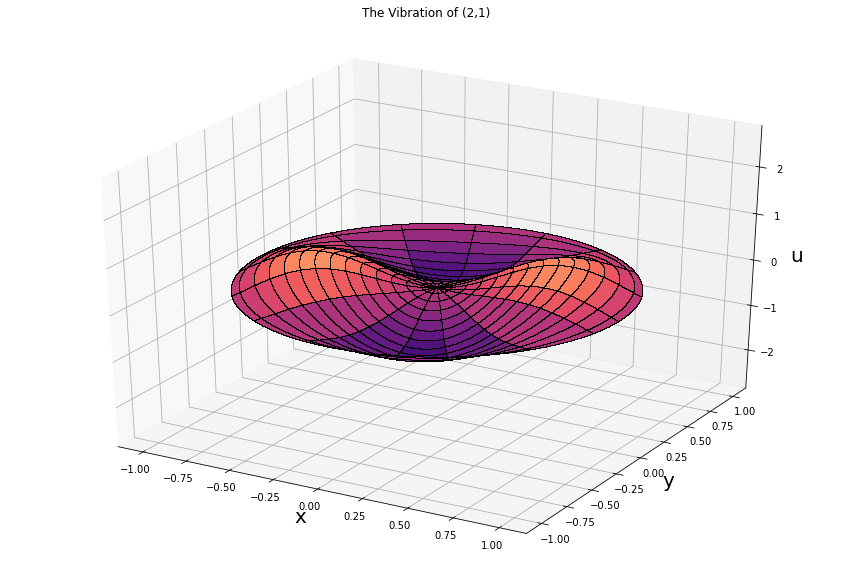

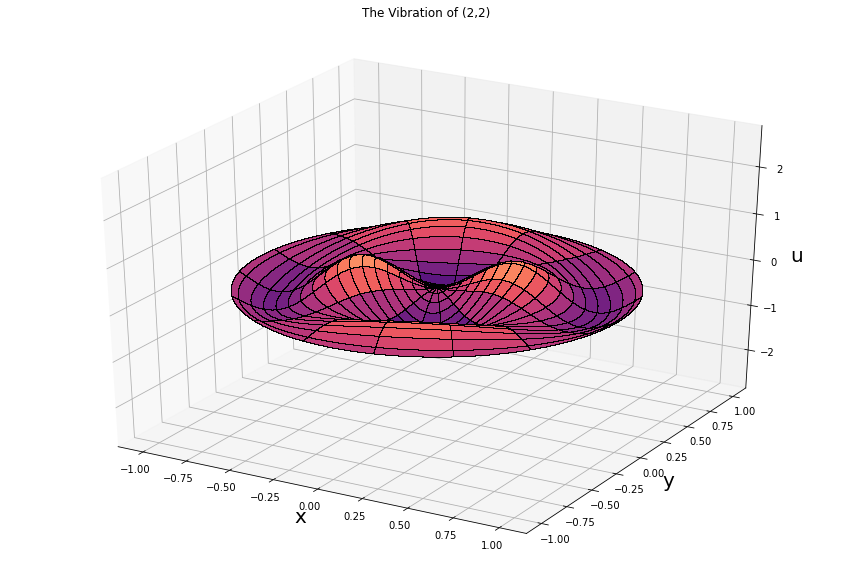

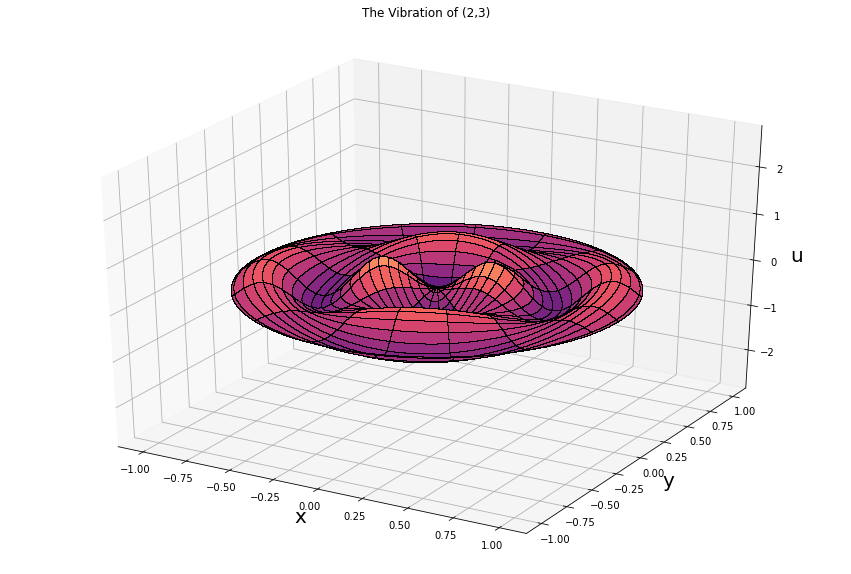

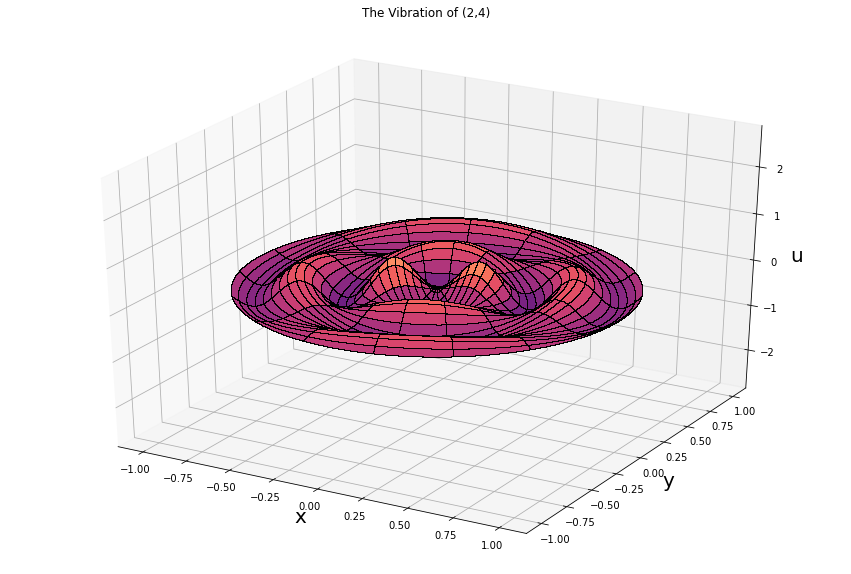

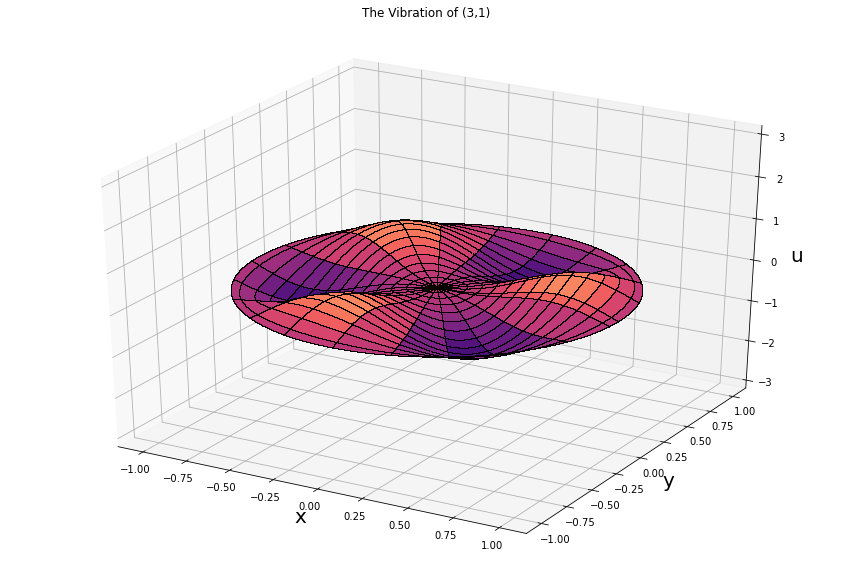

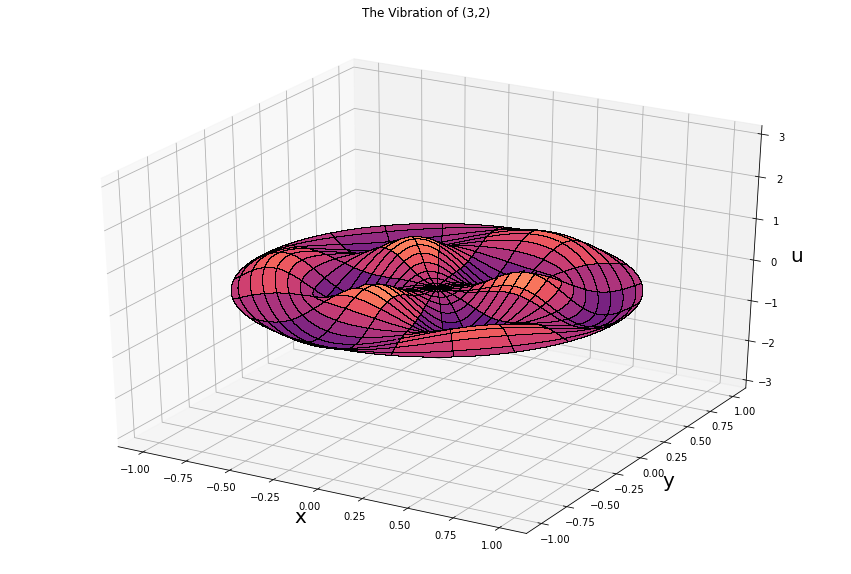

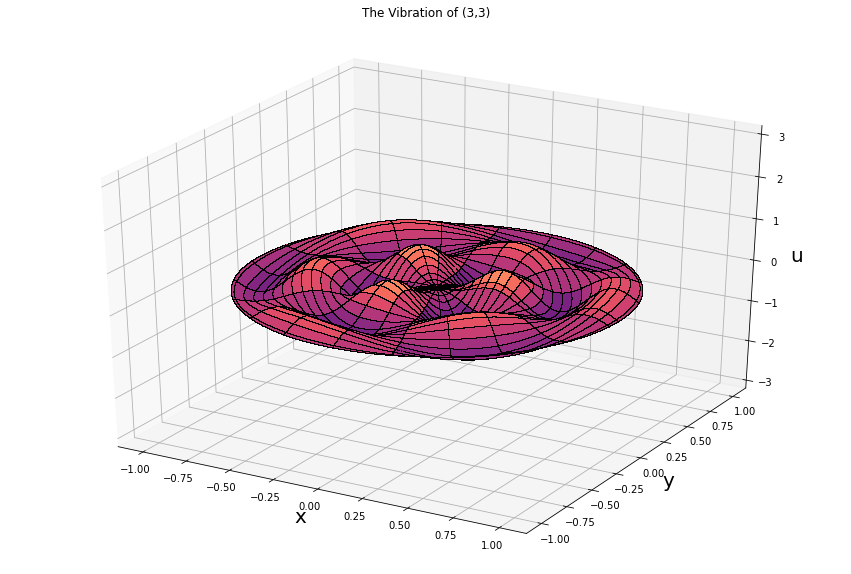

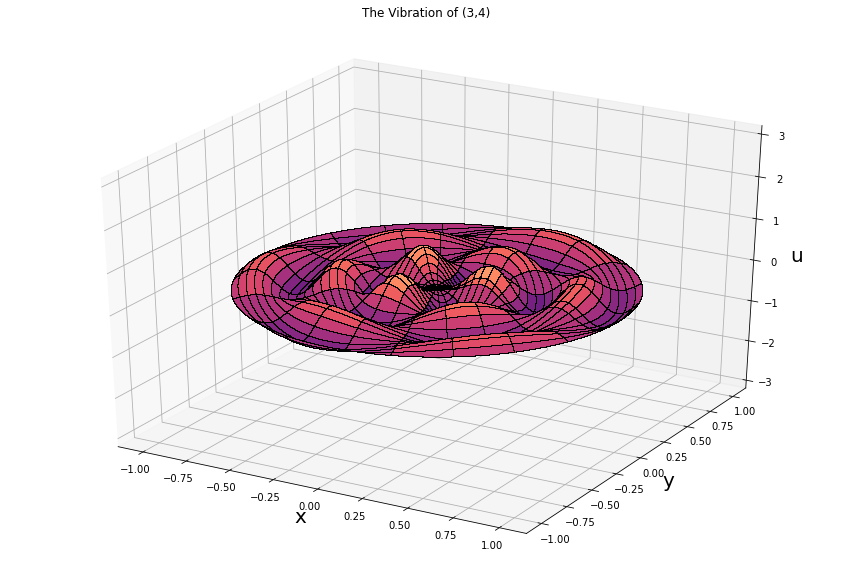

In [2]:
# Generate all modes up to (3,4) (has been already executed; please don't rerun to save time)
for m in range(0,4):
    for n in range(1,5):
        Mode(m,n,1,1).sim(fpath = 'Final/Modes')

### The $n$ parameter
* Below we observe that as $n$ increases, so too does the number of circular node, that is, circles where the drum displacement is stationary at all times.
* In the (0,1) case, there exists only the one circular node at the fixed rim of the drum which explains why $n$ must begin at 1: there is always the one circular node conferred by the boundary condition. This is analogous to the modes of a vibrating guitar string always having two nodes at both ends.
* For (0,2), another circular node has been added close to half the radial lenght of the drum, resulting in outer and inner anti-oscillating regions. 
* Finally, (0,4) shows four concentric nodes - as expected.

(0,1)| (0,2)| 
- | - 
![SegmentLocal](./Final/Modes/(0,1).gif) | ![SegmentLocal](./Final/Modes/(0,2).gif)

(0,3)| (0,4)| 
- | - 
![SegmentLocal](./Final/Modes/(0,3).gif) | ![SegmentLocal](./Final/Modes/(0,4).gif)

### The $m$ parameter
* Below we observe that $m$ corresponds to the number of diametral nodes: lines along the diameter where the drum displacement is stationary at all times.
* In the (0,1) case (above), there exists no linear node which explains why $m$ may begin at 0.
* For (1,1), a single diameter has been added resulting in anti-oscillating regions at either half of the drum.
* (4,1) shows four (radially equidistant) diametric lines

(1,1)| (2,1)|
- | - 
![SegmentLocal](./Final/Modes/(1,1).gif) | ![SegmentLocal](./Final/Modes/(2,1).gif)

(3,1)| (4,1)| 
- | - 
![SegmentLocal](./Final/Modes/(3,1).gif) | ![SegmentLocal](./Final/Modes/(4,1).gif)

## 3.2 Frequency Relation and Inharmonicity

* The natural frequencies on a guitar string are related to each other by integral multiples. What about the drum?
* In the bar graph below we see that the ratio of the frequencies of (1,1), (2,1), (3,1) and (4,1) to (0,1) are not integers.
* This indicates why a drum does not have a distinct pitch: the frequency of its modes do not belong to the harmonic series and are instead, irregular multiples of each other. 

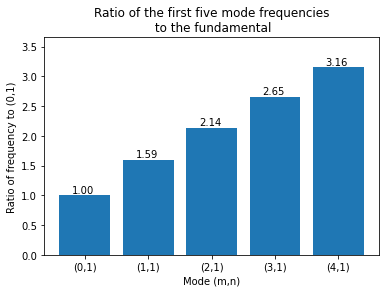

In [2]:
# Fundamental frequency
f0 = Mode(m=0, n=1, radius=1,c=1).getFrequency()


ratios = []
names = []

for m in range(0,5):
    mode = Mode(m,1,1,1)
    ratios.append(mode.getFrequency()/f0)
    names.append(mode.toString())

plt.figure(figsize=(6,4))
plt.ylim(0,max(ratios)+0.5)
plt.xlabel('Mode (m,n)')
plt.ylabel('Ratio of frequency to (0,1)')
plt.title('Ratio of the first five mode frequencies\n to the fundamental')
plt.bar(names, ratios, align='center')


for i in range(len(names)):
    plt.text(x = i-0.2, y = ratios[i]+0.04, s = "{:.2f}".format(ratios[i]), size = 10)



plt.savefig('./Final/Modes/ratios.png')


## 3.3a General Solution: Axisymmetric Pertubration

**Please note I've included a damping factor to make simulations more reflective of dissipation**
* To start off simple, let us observe solutions under initial conditions that possess radial symmetry
* Consider a reflected quadratic $u_0(r) = -r(r-1)$ whose vertex is halfway radially outwards from the drum's centre

In [2]:
def u0(r, theta):
    return -r*(r-1)

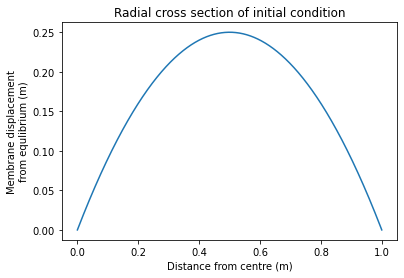

In [3]:
r = np.linspace(0,1,1000)
y = u0(r, None)
plt.title('Radial cross section of initial condition')
plt.xlabel('Distance from centre (m)')
plt.ylabel('Membrane displacement\nfrom equlibrium (m)')
plt.plot(r,y)
plt.show()

* For such an initial shape, the drum evolves accordingly:

In [ ]:
drumquaddown = CircularDrum(radius=1, c=1, u0=u0, maxm=5,maxn=4)
drumquaddown.sim(fname="-r(r-1)", fpath="Final\General\Axisymmetric")

Initial | Evolution |
- | - 
![SegmentLocal](./Final/General/Axisymmetric/-r(r-1).png) | ![SegmentLocal](./Final/General/Axisymmetric/-r(r-1).gif)

* Let us try with more initial conditions:

In [ ]:
drumquadup = CircularDrum(radius=1, c=1, u0=lambda r,theta: r**2, maxm=5,maxn=4)
drumquadup.sim(fname="r^2", fpath="Final\General\Axisymmetric")
drumquadup.simInitial(fname="r^2", fpath="Final\General\Axisymmetric")

drumsin = CircularDrum(radius=1, c=1, u0=lambda r,theta: np.sin(2*np.pi*r), maxm=5,maxn=4)
drumsin.sim(fname="sin(2pir)", fpath="Final\General\Axisymmetric")
drumsin.simInitial(fname="sin(2pir)", fpath="Final\General\Axisymmetric")

drumlinear = CircularDrum(radius=1, c=1, u0=lambda r,theta: r, maxm=5,maxn=4)
drumlinear.sim(fname="r", fpath="Final\General\Axisymmetric")
drumlinear.simInitial(fname="r", fpath="Final\General\Axisymmetric")

drumcubic = CircularDrum(radius=1, c=1, u0=lambda r,theta: -(r-1/2)**3, maxm=5,maxn=4)
drumcubic.sim(fname="-(r-0.5)^3", fpath="Final\General\Axisymmetric")
drumcubic.simInitial(fname="-(r-0.5)^3", fpath="Final\General\Axisymmetric")

Initial | Evolution |
- | - 
![SegmentLocal](./Final/General/Axisymmetric/r^2.png) | ![SegmentLocal](./Final/General/Axisymmetric/r^2.gif)
- | -
![SegmentLocal](./Final/General/Axisymmetric/sin(2pir).png) | ![SegmentLocal](./Final/General/Axisymmetric/sin(2pir).gif)
- | - 
![SegmentLocal](./Final/General/Axisymmetric/r.png) | ![SegmentLocal](./Final/General/Axisymmetric/r.gif)
- | -
![SegmentLocal](./Final/General/Axisymmetric/-(r-0.5)^3.png) | ![SegmentLocal](./Final/General/Axisymmetric/-(r-0.5)^3.gif)


* While the patterns above are unique to their respective initial condition, we observe that they all share one main feature: they do not display any diametral nodes.
* Recalling the nature of parameter $m$, we may infer that $m=0$ for all the modes comprising the superpositions of the drums above. To check this, consider the amplitudes of the modes comprising the $-(r-0.5)^3$ drum. 

In [46]:
threshold = 1e-15 #modes with amplitudes less than this are assumed to be noncontributing 
contributingModes = {mode.toString():(mode.getAmp()>threshold) for mode in drumcubic.modes}

for k,v in contributingModes.items():
    print(k, v)

(0,1) True
(0,2) True
(0,3) True
(0,4) True
(1,1) False
(1,2) False
(1,3) False
(1,4) False
(2,1) False
(2,2) False
(2,3) False
(2,4) False
(3,1) False
(3,2) False
(3,3) False
(3,4) False
(4,1) False
(4,2) False
(4,3) False
(4,4) False
(5,1) False
(5,2) False
(5,3) False
(5,4) False


* Indeed, we see that only modes of the form (0,n) contribute to the superposition.
* We may conclude that axisymmetric initial conditions only have (0,n) modes contributing to their general solution. 
* To investigate why this may be the case, let us consider the non-axisymmetric case. 

## 3.3b General Solution: Arbitrary Pertubration

* For the arbitrary perturbation case, we'll define a function $u_0$ that simulates the striking of a drum at a localised point located at radial length $rpos$ from the centre, and without loss of generality $\theta=0$ 
* Let us model the drum vibrations for such localised striked at various lengths ranging [0, 1]


MoviePy - Building file Final\General\Strike\r=0m.gif with imageio.


MoviePy - Building file Final\General\Strike\r=0.25m.gif with imageio.


MoviePy - Building file Final\General\Strike\r=0.5m.gif with imageio.


MoviePy - Building file Final\General\Strike\r=0.75m.gif with imageio.


MoviePy - Building file Final\General\Strike\r=1m.gif with imageio.


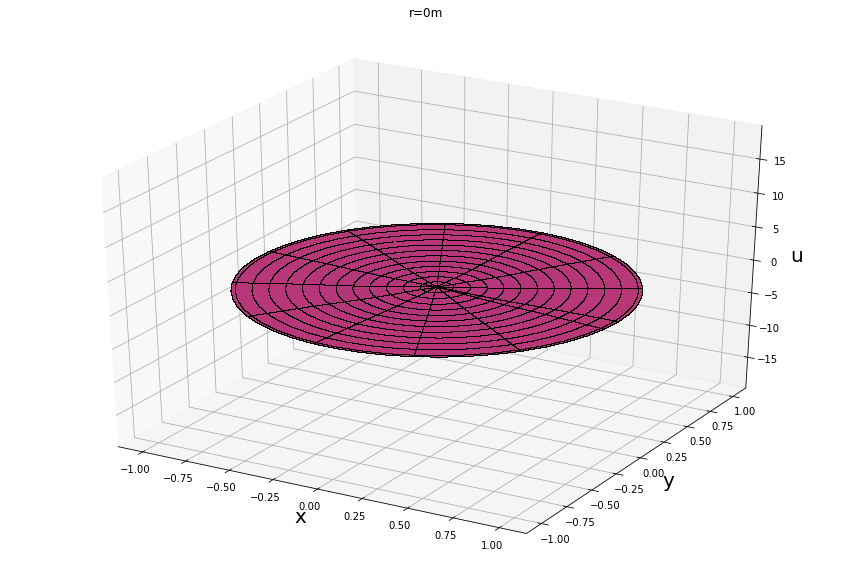

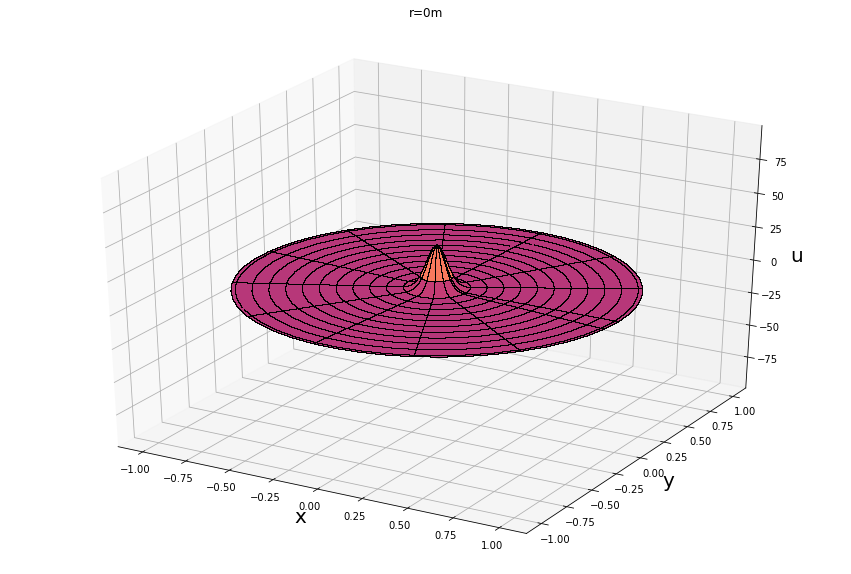

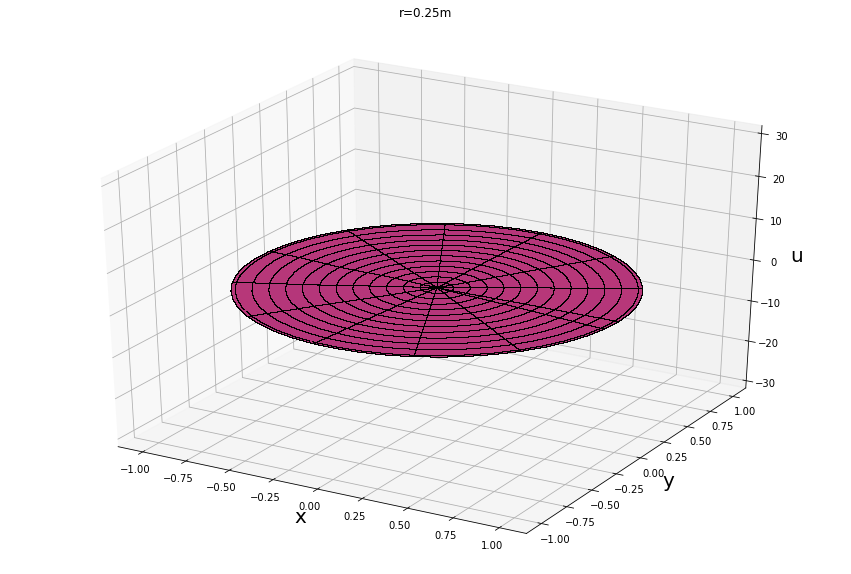

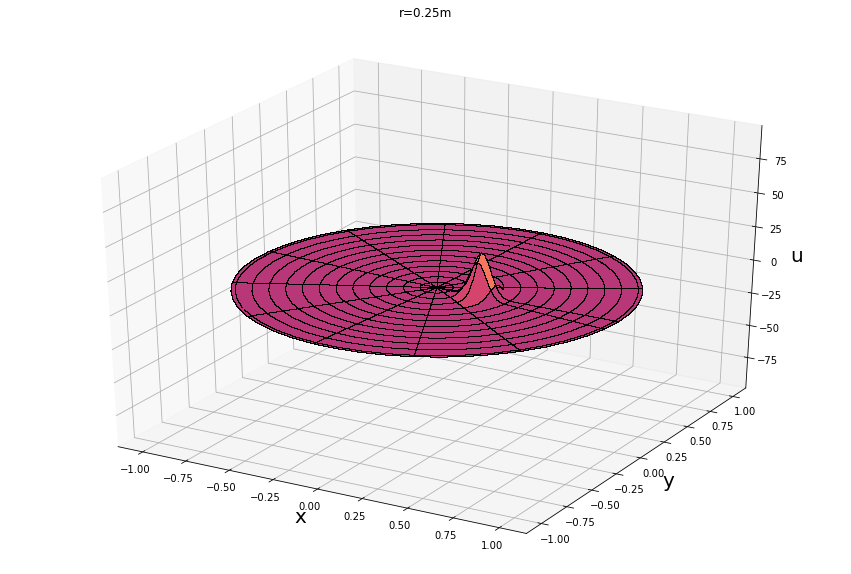

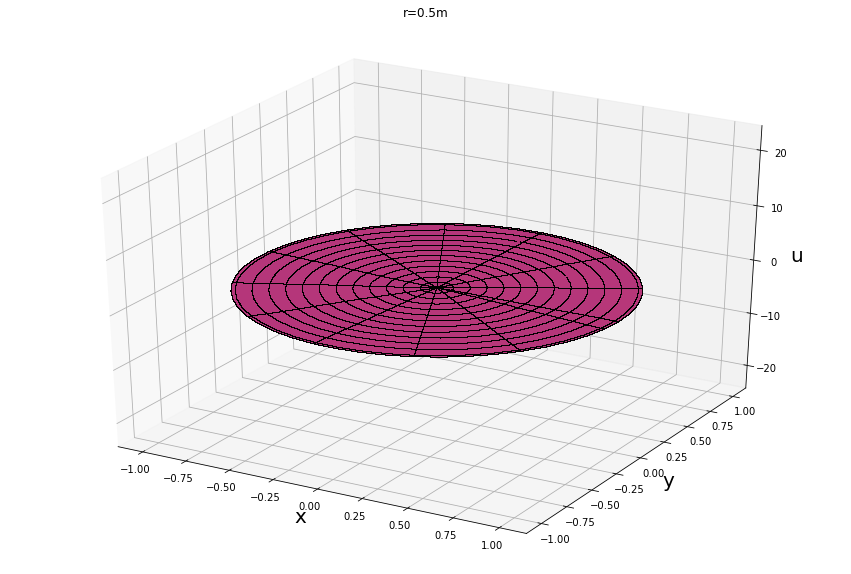

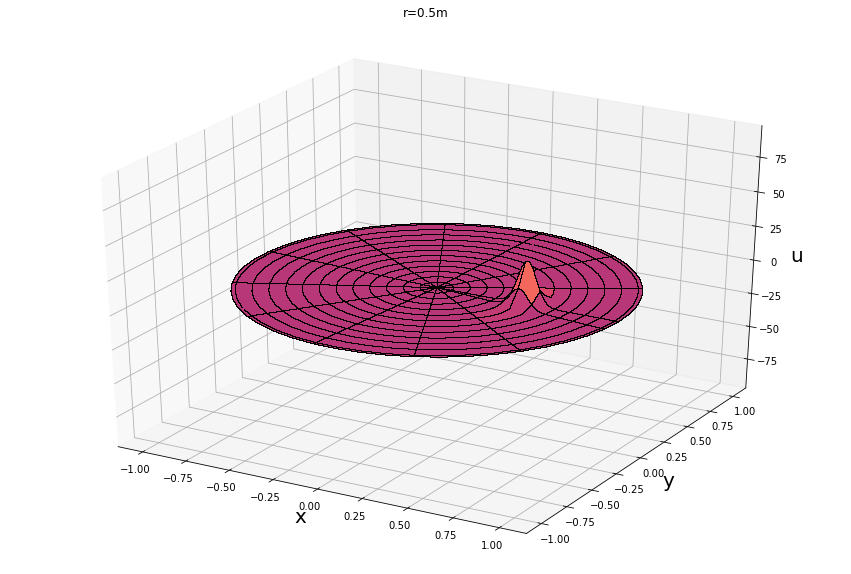

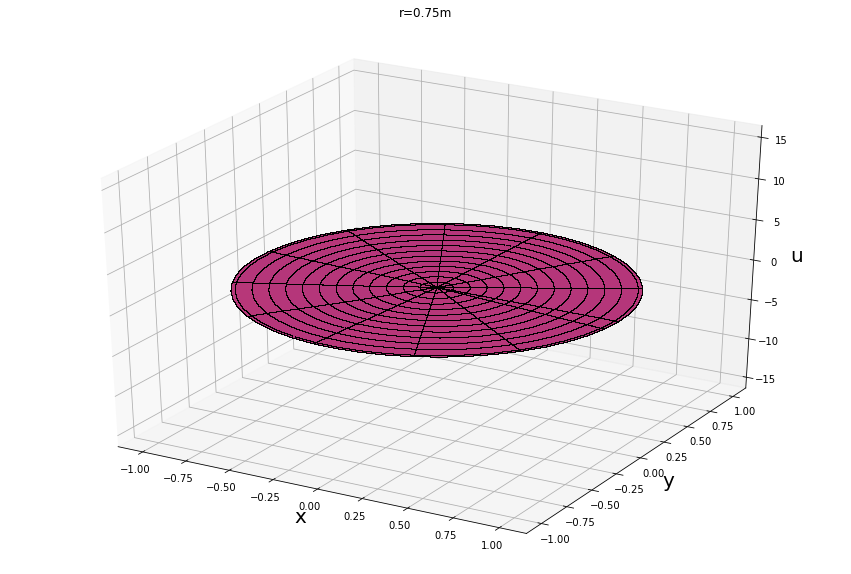

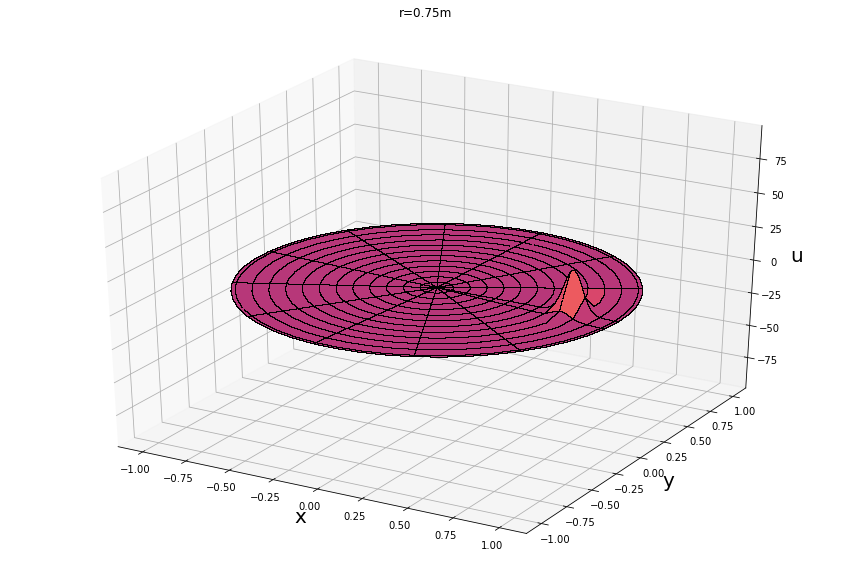

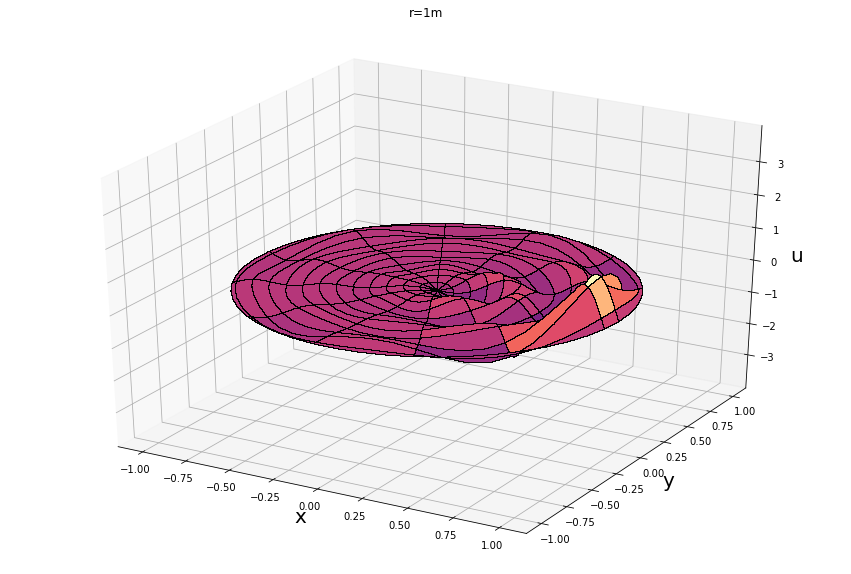

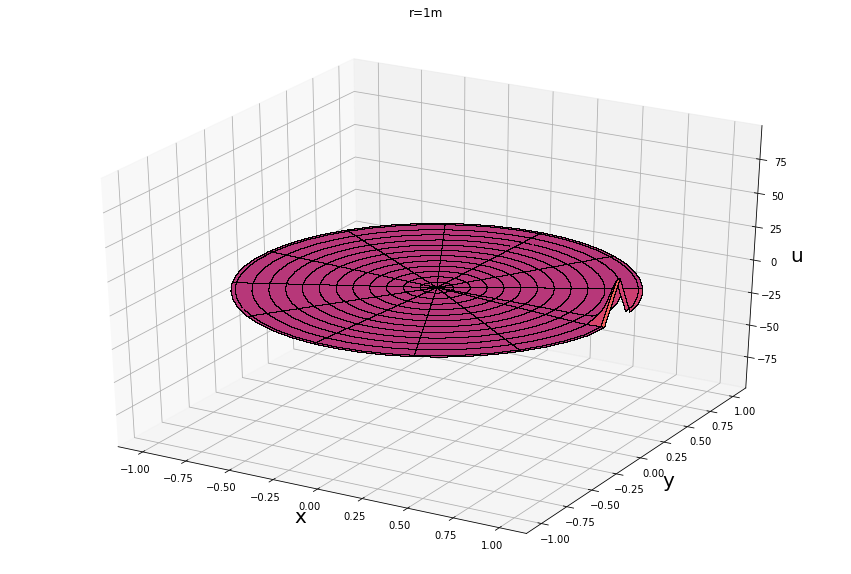

In [2]:
rpos = [0,0.25,0.5,0.75,1]

for i in rpos:
    def u0(r,theta):
        sigma = 0.05  # Localisation parameter
        impact = 10
        rpos = i
        angpoint = 0

        hdist = (r*np.cos(theta)-rpos*np.cos(angpoint))**2
        vdist = (r*np.sin(theta)-rpos*np.sin(angpoint))**2
        dist = hdist + vdist

        return  impact/(2*np.pi*sigma)*np.exp((-1/(2*sigma**2))*dist)
    
    drumstrike = CircularDrum(1, 1, u0, 5, 4)
    drumstrike.sim(fname="r={}m".format(i), fpath="Final\General\Strike")
    drumstrike.simInitial(fname="r={}m".format(i), fpath="Final\General\Strike")
    
    

Initial | Evolution |
- | - 
![SegmentLocal](./Final/General/Strike/r=0m.png) | ![SegmentLocal](./Final/General/Strike/r=0m.gif)
- | -
![SegmentLocal](./Final/General/Strike/r=0.25m.png) | ![SegmentLocal](./Final/General/Strike/r=0.25m.gif)
- | - 
![SegmentLocal](./Final/General/Strike/r=0.5m.png) | ![SegmentLocal](./Final/General/Strike/r=0.5m.gif)
- | -
![SegmentLocal](./Final/General/Strike/r=0.75m.png) | ![SegmentLocal](./Final/General/Strike/r=0.75m.gif)
- | -
![SegmentLocal](./Final/General/Strike/r=1m.png) | ![SegmentLocal](./Final/General/Strike/r=1m.gif)


* It seems that the closer the strike is to the centre of the membrane, the more excited are its circular modes. 
* To precisely see why this is the case, we observe the amplitude of certain modes over a range of radial striking lengths.

In [ ]:
# Collect data for the amplitude of a range of modes within the superposition of general solution
rpos = np.linspace(0, 1, 100)
for i in rpos:
    def u0(r,theta):
        sigma = 0.05
        impact = 10
        rpos = i
        angpoint = 0

        hdist = (r*np.cos(theta)-rpos*np.cos(angpoint))**2
        vdist = (r*np.sin(theta)-rpos*np.sin(angpoint))**2
        dist = hdist + vdist

        return  impact/(2*np.pi*sigma)*np.exp((-1/(2*sigma**2))*dist)
    
    drum = CircularDrum(1, 1340, u0, 5, 4)
    amps = {mode.toString(): [mode.getAmp()] for mode in drum.modes}
    
    if(i==0):
        allamps = pd.DataFrame(amps)
    else:
        allamps = pd.concat([allamps, pd.DataFrame(amps)])

allamps.to_csv('./Final/General/Strike/allamps.csv', index=False)
    

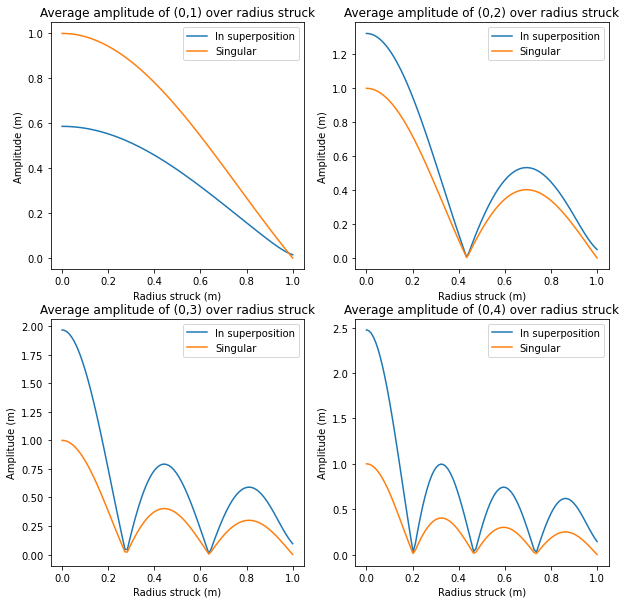

In [19]:
fig, axs = plt.subplots(2,2, figsize=(10,10))
axs = np.array(axs).reshape(4,)
rpos = np.linspace(0, 1, 100)

for i in range(0,4):
    for mode, amp in allamps.iloc[:, range(0+i,1+i)].iteritems():
        axs[i].plot(rpos, amp, label='In superposition')
        
        axs[i].plot(rpos, abs(Mode(int(list(mode)[1]), int(list(mode)[3]), 1, 1340,).u(rpos, 0,0)), label='Singular')
        
        axs[i].set_title('Average amplitude of {} over radius struck'.format(mode))
        axs[i].set_xlabel('Radius struck (m)')
        axs[i].set_ylabel('Amplitude (m)')
        axs[i].legend()

plt.savefig('./Final/General/Strike/excitation.png')
        

* The orange curves in the graphs above represent the absolute value of the specific mode's displacement over the radial length [0,1]
* The blue curve represents the amplitude of that given mode when contributing to general solutions solved for a range of striking radii [0,1] 
* We observe that the degree to which a mode is excited upon a drum being struck at a point depends on how vigorously the mode naturally oscillates at that point. 
* For example, from the graph above we see that the (0,2) mode is not activated when the drum is struck at a radial length of ~0.43m, as that corresponds to one of (0,2)'s circular nodes - where it is stationary. 
* This suggests that axisymmetric petrubrations excite only modes of form (0,n) because such pertubrations (by definition) cannot involve a stationary diameter, which is a condition required for any general (m,n) to be excited. 

